k=1
 chip1: [-0.3  1. ] ==> OK
 chip2: [-0.5 -0.1] ==> Fail
 chip3: [0.6 0. ] ==> Fail
k=3
 chip1: [-0.3  1. ] ==> Fail
 chip2: [-0.5 -0.1] ==> Fail
 chip3: [0.6 0. ] ==> OK
k=5
 chip1: [-0.3  1. ] ==> Fail
 chip2: [-0.5 -0.1] ==> OK
 chip3: [0.6 0. ] ==> OK
k=7
 chip1: [-0.3  1. ] ==> Fail
 chip2: [-0.5 -0.1] ==> Fail
 chip3: [0.6 0. ] ==> OK


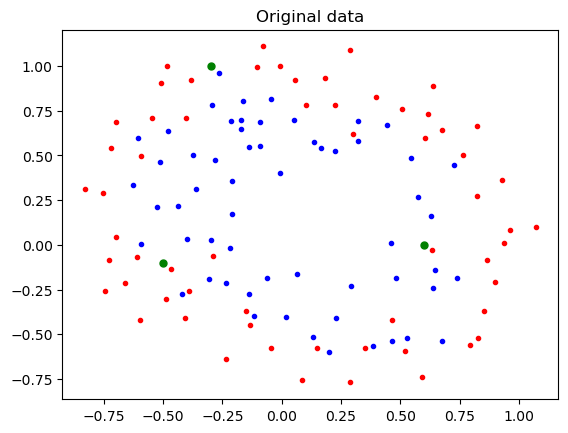

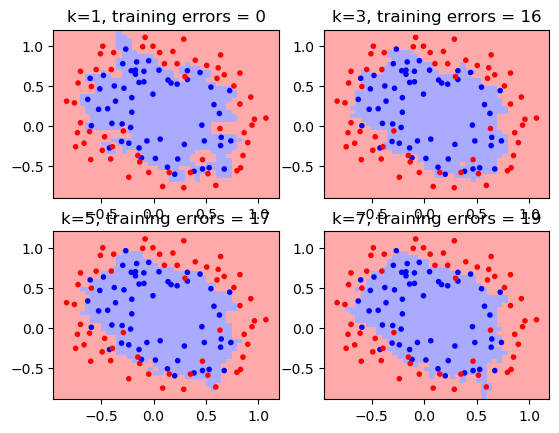

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator
from matplotlib.colors import ListedColormap

# Euclidean distance
def euclideanDistance(x1, y1, x2, y2):
    distance = (pow((x1 - x2), 2)) + pow((y1 - y2),2)
    return np.sqrt(distance)

# K nearest neighbor function
def knn(trainingSet, testInstance, k):

    # Calculate distance for every x in the training set
    distances = {}
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance[0], testInstance[1], trainingSet[x][0], trainingSet[x][1])
        distances[x] = dist

    # Sort distances in ascending order
    asc_distances = sorted(distances.items(), key=operator.itemgetter(1))

    # Fetch the knn
    neighbors = []
    for x in range(k):
        neighbors.append(asc_distances[x][0])

    # Decide if OK or fail has majority
    ok = 0
    fail = 0
    for x in range(len(neighbors)):
        response = trainingSet[neighbors[x]][2]
        if (response == 1):
            ok = ok + 1
        else:
            fail = fail + 1

    # Return OK or fail
    if (ok > fail):
        return 1
    else:
        return 0

# Function to calculate training errors
def trainingError(k, my_data, y):
    count = 0
    trainingSet = my_data
    y_arr = np.asarray(y)

    index = 0
    for x in my_data:

        # Calculate distance for every x in the training set
        distances = {}
        for y in range(len(trainingSet)):
            dist = euclideanDistance(x[0], x[1], trainingSet[y][0], trainingSet[y][1])
            distances[y] = dist

        # Sort distances in ascending order
        asc_distances = sorted(distances.items(), key=operator.itemgetter(1))

        # Fetch the knn
        neighbors = []
        for x in range(k):
            neighbors.append(asc_distances[x][0])

        # Decide if OK or fail has majority
        ok = 0
        fail = 0
        for x in range(len(neighbors)):
            response = trainingSet[neighbors[x]][2]
            if (response == 1):
                ok = ok + 1
            else:
                fail = fail + 1

        # Decide class
        if (ok > fail):
            class_result = 1
        else:
            class_result = 0

        # Increase error if predicted and actual is not the same class
        if (y_arr[index] != class_result):
            count = count + 1

        index = index + 1

    return count

# Load the data
my_data = np.genfromtxt('microchips.csv', delimiter=',')

# Unknown microchips
unknownChips = np.array([[-0.3, 1.0], [-0.5, -0.1], [0.6, 0.0]])
ok_plot = []
fail_plot = []

# Divide chips to either OK or fail
for chip in my_data:
    if (chip[2] == 1):
        ok_plot.append(chip)
    else:
        fail_plot.append(chip)

ok_arr = np.asarray(ok_plot)
fail_arr = np.asarray(fail_plot)

# Plotting the original microchip data (OK and fail)
plt.figure(1)
plt.title("Original data")
plt.plot(unknownChips[:, 0], unknownChips[:, 1], 'go', markersize=5)
plt.plot(ok_arr[:, 0], ok_arr[:, 1], 'bo', markersize=3)
plt.plot(fail_arr[:, 0], fail_arr[:, 1], 'ro', markersize=3)

# Unknown microchips predicition - OK or fail
for k in [1,3,5,7]:
    print('k=%i' % + k)
    message = ''
    for x in range(len(unknownChips)):
        result = knn(my_data, unknownChips[x], k)
        if (result == 1):
            message = 'OK'
        else:
            message = 'Fail'
        print(' chip' + str((x + 1)) + ': ' + str(unknownChips[x]) + ' ==> ' + message)

# Start of decision bonundary
h = .05 # step size in the mesh
x_min, x_max = my_data[:, 0].min()-0.1, my_data[:, 0].max()+0.1
y_min, y_max = my_data[:, 1].min()-0.1, my_data[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) # Mesh Grid
xy_mesh = np.c_[xx.ravel(), yy.ravel()] # Turn to Nx2 matrix

# Mesh plot colors
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Decision boundary
plt.figure(2)
figNr = 0
for k in [1,3,5,7]:
    figNr = figNr + 1
    plt.subplot(2, 2, figNr)

    # Calculate training errors
    count = trainingError(k, my_data, my_data[:, 2])

    # Plotting microchip data
    plt.title("k=%i, training errors = %i" % (k, count))

    # Classify each point in the xy-mesh
    classes = []
    for x in xy_mesh:
        result = knn(my_data, x, k)
        classes.append([result])
    classes_arr = np.asarray(classes)

    # Return to mesh shape
    clz_mesh = classes_arr.reshape(xx.shape)

    # Plot the xy-mesh and points
    plt.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
    plt.scatter(my_data[:, 0], my_data[:, 1], c=my_data[:, 2], marker='.', cmap=cmap_bold)

plt.show()